In [47]:
folder = 'log/'
files = ! ls $folder
print(files)

['slimevolley_SlimeVolley-v0_False_20210706130755', 'slimevolley_SlimeVolley-v0_selfplay_20210706133854']


In [48]:
file_dir = folder+files[0]
print(file_dir)

log/slimevolley_SlimeVolley-v0_False_20210706130755


In [49]:
import json
data = json.load( open(file_dir+"/process.json"))

In [50]:
print(data.keys())

dict_keys(['episode reward', 'loss'])


In [51]:
import matplotlib.pyplot as plt
import numpy as np
def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

colors = ['r', 'b', 'c', 'y']

Text(0, 0.5, 'reward')

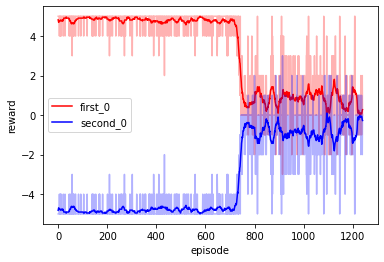

In [52]:
for (k, v), c in zip(data['episode reward'].items(), colors):
    plt.plot(smooth(v, radius=10), color=c, label=k)
    plt.plot(v, color=c, alpha=0.3)
plt.legend()
plt.xlabel('episode')
plt.ylabel('reward')

Text(0, 0.5, 'loss')

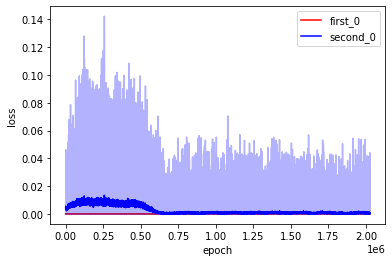

In [53]:
for (k, v), c in zip(data['loss'].items(), colors):
    plt.plot(smooth(v, radius=100), color=c, label=k)
    plt.plot(v, color=c, alpha=0.3)
plt.legend()
plt.xlabel('epoch')  # training epoch, maybe multiple per episode
plt.ylabel('loss')